<a href="https://colab.research.google.com/github/mimomaina/machine-learning_002/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler


# Load Dataset

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Exporation and cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#percentage of null values in the columns
df.isnull().sum()/len(df)*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
#drop irrelevant columns
df.drop({'CustomerID'}, axis=1, inplace=True)

In [ ]:
mode_description=df['Description'].mode()[0]
df['Description'].fillna(mode_description, inplace=True)

# Visualization

# Data Modelling

In [ ]:
#Encoding
#frequency encode 'Description'


In [ ]:
df.info()

In [ ]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True,dtype=int)


In [ ]:
df['InvoiceNo_Freq']=df['InvoiceNo'].map(df['InvoiceNo'].value_counts())
df= df.drop(columns=['InvoiceNo'])

In [ ]:
df['StockCode_Freq'] = df['StockCode'].map(df['StockCode'].value_counts())
df= df.drop(columns=['StockCode'])


In [ ]:
scaler = StandardScaler()
df['Quantity'] = scaler.fit_transform(df[['Quantity']])


In [ ]:
df['UnitPrice'] = scaler.fit_transform(df[['UnitPrice']])


In [ ]:
df['Quantity'] = scaler.fit_transform(df[['Quantity']])


In [ ]:
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['InvoiceDayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df['InvoiceHour'] = pd.to_datetime(df['InvoiceDate']).dt.hour



In [ ]:
df=df.drop(columns=['InvoiceDate'])

In [ ]:
#drop Invoice Year
df.drop(columns=['InvoiceYear'], inplace=True)

In [ ]:
df.drop(columns=['Description'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      541909 non-null  float64
 1   UnitPrice                     541909 non-null  float64
 2   Country_Austria               541909 non-null  int64  
 3   Country_Bahrain               541909 non-null  int64  
 4   Country_Belgium               541909 non-null  int64  
 5   Country_Brazil                541909 non-null  int64  
 6   Country_Canada                541909 non-null  int64  
 7   Country_Channel Islands       541909 non-null  int64  
 8   Country_Cyprus                541909 non-null  int64  
 9   Country_Czech Republic        541909 non-null  int64  
 10  Country_Denmark               541909 non-null  int64  
 11  Country_EIRE                  541909 non-null  int64  
 12  Country_European Community    541909 non-nul

 linkage matrix determines how clusters are formed. The choice of method influences the clustering process:

Single linkage: Merges clusters based on the shortest distance between points.

Complete linkage: Merges clusters based on the farthest distance.

Average linkage: Uses the average distance between all points in the clusters.

Ward's method: Minimizes variance within clusters (commonly used for numerical data).

In [ ]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

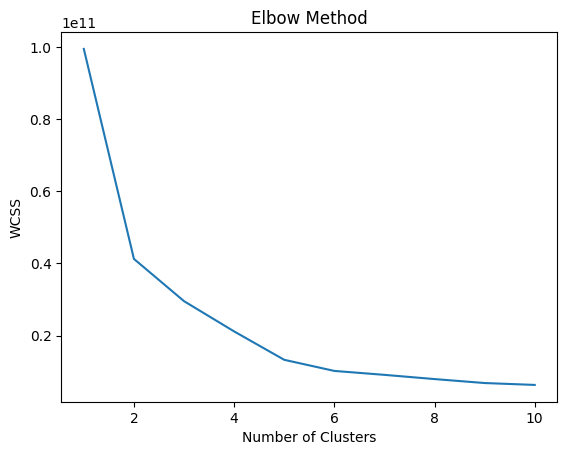

In [ ]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Look for an "elbow point" where adding more clusters does not significantly reduce WCSS(within-cluster sum of squares)

In this case, the elbow appears to be around k = 4, as the WCSS decreases significantly up to this point and then levels off more gradually for higher values of k.

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df)


In [ ]:
#aggregate analysis
df['Cluster'] = cluster_labels
print(df.groupby('Cluster').mean(),desc= TRUE)


         Quantity  UnitPrice  Country_Austria  Country_Bahrain  \
Cluster                                                          
0       -0.006527  -0.003694         0.000661         0.000050   
1        0.009098  -0.013116         0.000796         0.000039   
2        0.030893   0.001499         0.000414         0.000069   
3        0.004167   0.012060         0.000874         0.000006   

         Country_Belgium  Country_Brazil  Country_Canada  \
Cluster                                                    
0               0.003035        0.000050        0.000318   
1               0.006084        0.000118        0.000183   
2               0.003242        0.000069        0.000138   
3               0.004152        0.000048        0.000268   

         Country_Channel Islands  Country_Cyprus  Country_Czech Republic  ...  \
Cluster                                                                   ...   
0                       0.001012        0.001433                0.000064  ...   

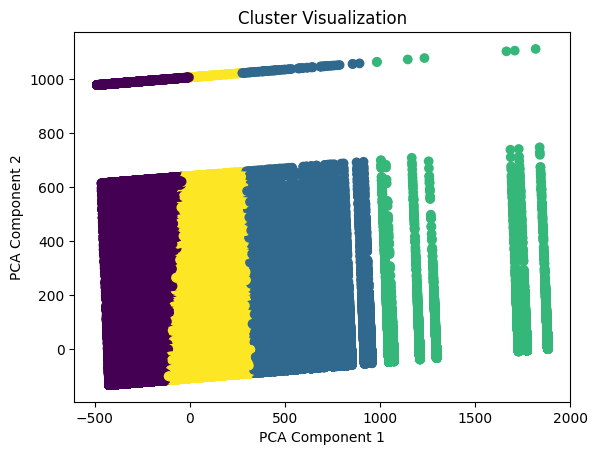

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

The data points are grouped into distinct clusters. This suggests that the K-Means algorithm was able to identify patterns or similarities among the data points.

The purple cluster appears to have a narrow spread, indicating that the points in this cluster might be more similar to each other.

The green cluster appears more dispersed, suggesting greater variation among the data points in this group.

Some clusters (e.g., blue and yellow) appear to have slight overlaps, which might indicate that there are shared characteristics between those groups.

In [ ]:
score = silhouette_score(df, cluster_labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4391907150705453
